In [1]:
print("Hello world!")

Hello world!


In [2]:
import os
import tarfile
from six.moves import urllib


HOUSING_PATH = os.path.join("datasets", "housing")
#DOWNLOAD_ROOT = "https://raw.githubusercontent.com/ageron/handson-ml/master/"
#HOUSING_URL = DOWNLOAD_ROOT + "datasets/housing/housing.tgz"
"""
def fetch_housing_data(housing_url=HOUSING_URL, housing_path=HOUSING_PATH):
    if not os.path.isdir(housing_path):
        os.makedirs(housing_path)
    tgz_path = os.path.join(housing_path, "housing.tgz")
    urllib.request.urlretrieve(housing_url, tgz_path)
    housing_tgz = tarfile.open(tgz_path)
    housing_tgz.extractall(path=housing_path)
    housing_tgz.close()
"""

'\ndef fetch_housing_data(housing_url=HOUSING_URL, housing_path=HOUSING_PATH):\n    if not os.path.isdir(housing_path):\n        os.makedirs(housing_path)\n    tgz_path = os.path.join(housing_path, "housing.tgz")\n    urllib.request.urlretrieve(housing_url, tgz_path)\n    housing_tgz = tarfile.open(tgz_path)\n    housing_tgz.extractall(path=housing_path)\n    housing_tgz.close()\n'

In [3]:
#fetch_housing_data()

In [4]:
import pandas as pd

def load_housing_data(housing_path=HOUSING_PATH):
    csv_path = os.path.join(housing_path, "housing.csv")
    return pd.read_csv(csv_path)

In [5]:
housing = load_housing_data()

In [6]:
housing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
longitude             20640 non-null float64
latitude              20640 non-null float64
housing_median_age    20640 non-null float64
total_rooms           20640 non-null float64
total_bedrooms        20433 non-null float64
population            20640 non-null float64
households            20640 non-null float64
median_income         20640 non-null float64
median_house_value    20640 non-null float64
ocean_proximity       20640 non-null object
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


In [7]:
housing["ocean_proximity"].value_counts()

<1H OCEAN     9136
INLAND        6551
NEAR OCEAN    2658
NEAR BAY      2290
ISLAND           5
Name: ocean_proximity, dtype: int64

In [8]:
housing.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


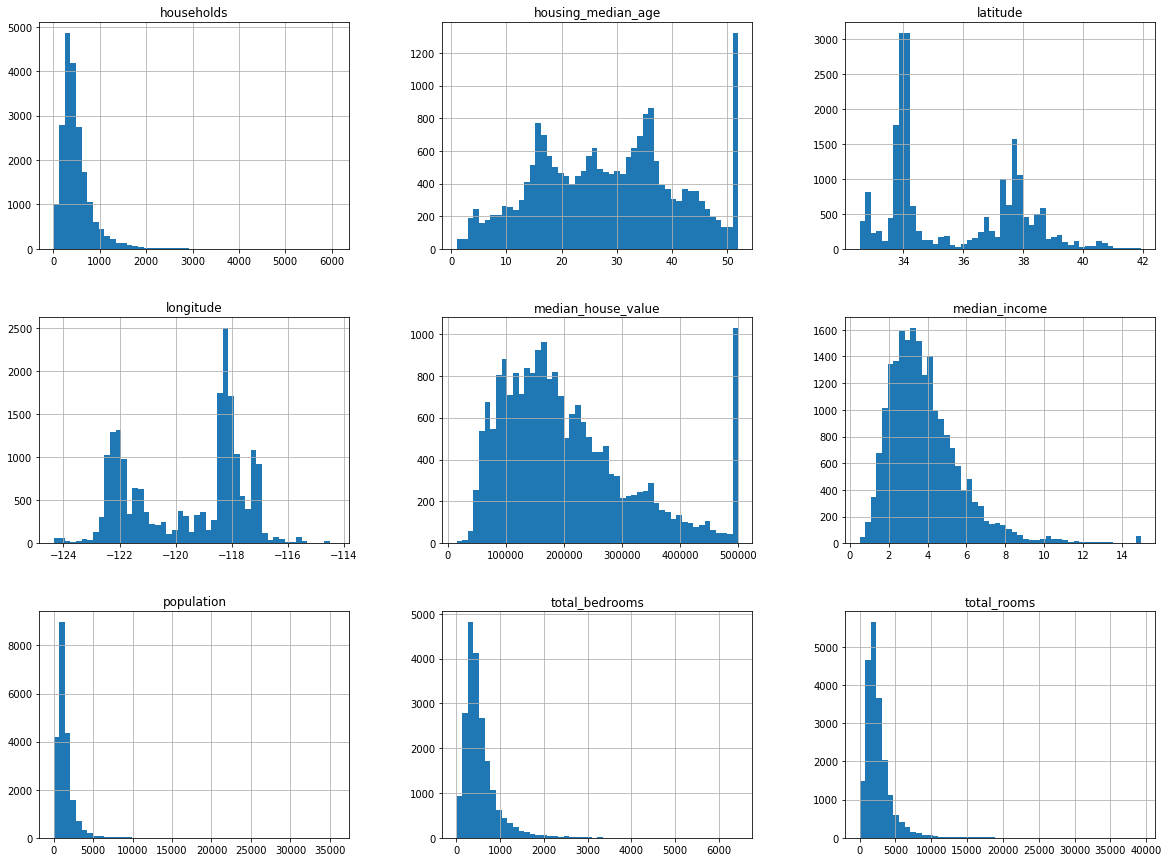

In [9]:
%matplotlib inline 
#only in a jupyter notebook
import matplotlib.pyplot as plt
housing.hist(bins=50, figsize=(20,15))
plt.show()

In [10]:
import numpy as np

In [11]:
def split_train_test(data, test_ratio):
    shuffled_indices = np.random.permutation(len(data))
    test_set_size = int(len(data)*test_ratio)
    test_indices = shuffled_indices[:test_set_size]
    train_indices = shuffled_indices[test_set_size:]
    return data.iloc[train_indices], data.iloc[test_indices]

In [12]:
shuf = np.random.permutation(len(housing))
shuf[:20]

array([12008, 10886,  9139, 18784,  9445, 19714,  4711,  1254,  1134,
       20408,  3302, 20538,  4501,    69,  2705,   106, 18504,   868,
       16631,  5652])

In [13]:
shuf[18:]

array([16631,  5652, 19048, ...,  1548, 17683, 13270])

In [14]:
train_set, test_set = split_train_test(housing,0.2)
len(train_set)

16512

In [15]:
len(test_set)

4128

In [16]:
from zlib import crc32
def test_set_check(identifier, test_ratio):
    return crc32(np.int64(identifier)) & 0xfffffffff < test_ratio * 2**32 #the hell is this
def split_train_test_by_id(data, test_ratio, id_column):
    ids = data[id_column]
    in_test_set = ids.apply(lambda id_: test_set_check(id_, test_ratio))
    return data.loc[~in_test_set], data.loc[in_test_set] #what the hell is tilde: NOT logical operator

In [17]:
housing_with_id = housing.reset_index() #adds an 'index' column
train_set, test_set = split_train_test_by_id(housing_with_id, 0.2, "index")

In [18]:
housing_with_id["id"] = housing["longitude"]*1000+housing["latitude"]
train_set, test_set = split_train_test_by_id(housing_with_id, 0.2, "id")

In [19]:
from sklearn.model_selection import train_test_split
train_set, test_set = train_test_split(housing, test_size=0.2, random_state=42) # built in function
#this achieves the same thing as above and includes a random generator seed option
#can pass to it multiple datasets with = # of rows, split on same indices

In [77]:
len(housing.median_income.unique())

10905

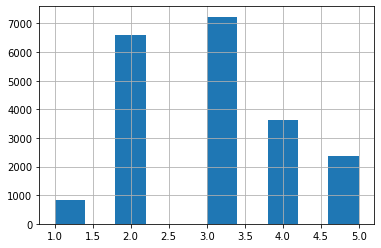

In [21]:
housing["income_cat"] = pd.cut(housing["median_income"],
                              bins=[0., 1.5, 3.0, 4.5, 6., np.inf], #the hell is this
                              labels=[1, 2, 3, 4, 5])
housing["income_cat"].hist()

In [22]:
housing["income_cat"]

0        5
1        5
2        5
3        4
4        3
        ..
20635    2
20636    2
20637    2
20638    2
20639    2
Name: income_cat, Length: 20640, dtype: category
Categories (5, int64): [1 < 2 < 3 < 4 < 5]

In [23]:
from sklearn.model_selection import StratifiedShuffleSplit
split = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=42)
for train_index, test_index in split.split(housing, housing["income_cat"]):                               
    strat_train_set = housing.loc[train_index]
    strat_test_set = housing.loc[test_index]

In [24]:
strat_test_set["income_cat"].value_counts() / len(strat_test_set)

3    0.350533
2    0.318798
4    0.176357
5    0.114583
1    0.039729
Name: income_cat, dtype: float64

In [25]:
#how did he create Fig 2-10: overall, random, stratified and %errors

In [26]:
for set_ in (strat_train_set, strat_test_set):
    set_.drop("income_cat", axis=1, inplace=True)

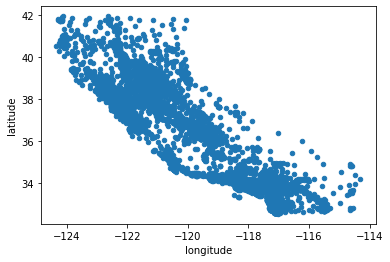

In [27]:
housing.plot(kind="scatter", x="longitude", y="latitude")

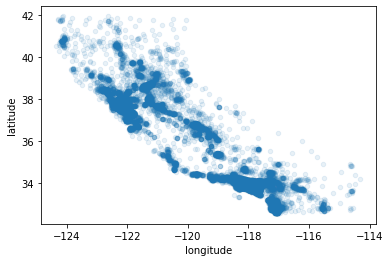

In [28]:
housing.plot(kind="scatter", x="longitude", y="latitude", alpha=0.1)

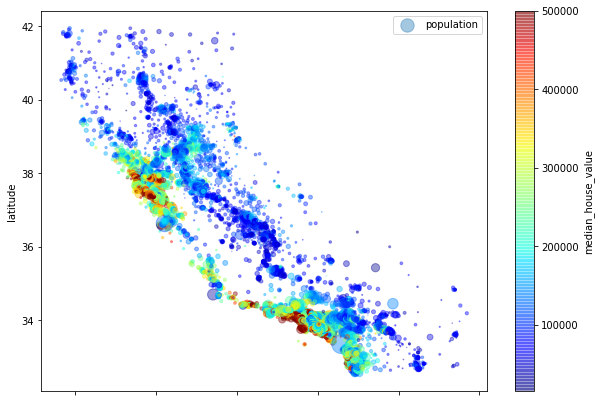

In [29]:
housing.plot(kind="scatter", x="longitude", y="latitude", alpha=0.4,
            s=housing["population"]/100, label="population", figsize=(10,7),
            c="median_house_value", cmap=plt.get_cmap("jet"), colorbar=True,
)
plt.legend()

In [30]:
corr_matrix=housing.corr() #can use this because dataset is not too large

In [31]:
corr_matrix["median_house_value"].sort_values(ascending=False)
#correlation coefficient only measures linear correlations

median_house_value    1.000000
median_income         0.688075
total_rooms           0.134153
housing_median_age    0.105623
households            0.065843
total_bedrooms        0.049686
population           -0.024650
longitude            -0.045967
latitude             -0.144160
Name: median_house_value, dtype: float64

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x11a3c86d0>,
      dtype=object)

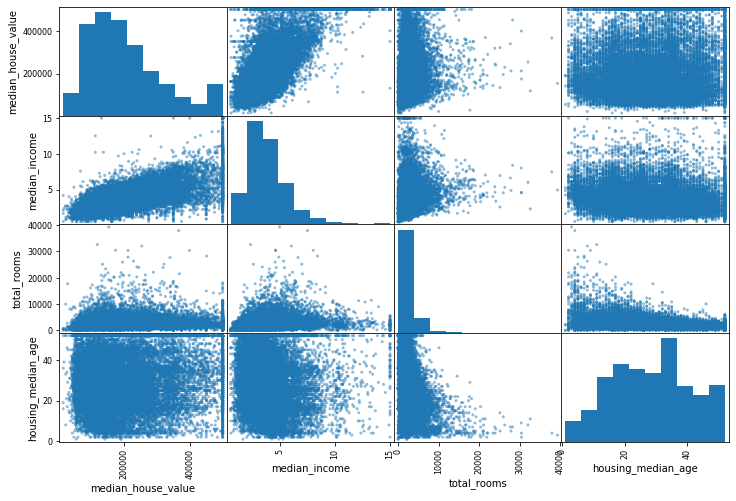

In [32]:
from pandas.plotting import scatter_matrix
attributes = ["median_house_value","median_income","total_rooms","housing_median_age"]
scatter_matrix(housing[attributes], figsize=(12, 8))

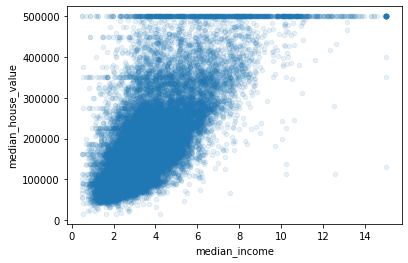

In [33]:
housing.plot(kind="scatter",x="median_income",y="median_house_value",alpha=0.1)

In [34]:
housing["rooms_per_household"] = housing["total_rooms"]/housing["households"]
housing["bedrooms_per_room"] = housing["total_bedrooms"]/housing["total_rooms"]
housing["population_per_household"] = housing["population"]/housing["households"]

In [35]:
corr_matrix=housing.corr()
corr_matrix["median_house_value"].sort_values(ascending=False)

median_house_value          1.000000
median_income               0.688075
rooms_per_household         0.151948
total_rooms                 0.134153
housing_median_age          0.105623
households                  0.065843
total_bedrooms              0.049686
population_per_household   -0.023737
population                 -0.024650
longitude                  -0.045967
latitude                   -0.144160
bedrooms_per_room          -0.255880
Name: median_house_value, dtype: float64

In [36]:
housing = strat_train_set.drop("median_house_value",axis=1) #creates a copy
housing_labels = strat_train_set["median_house_value"].copy()

In [37]:
strat_train_set.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
17606,-121.89,37.29,38.0,1568.0,351.0,710.0,339.0,2.7042,286600.0,<1H OCEAN
18632,-121.93,37.05,14.0,679.0,108.0,306.0,113.0,6.4214,340600.0,<1H OCEAN
14650,-117.20,32.77,31.0,1952.0,471.0,936.0,462.0,2.8621,196900.0,NEAR OCEAN
3230,-119.61,36.31,25.0,1847.0,371.0,1460.0,353.0,1.8839,46300.0,INLAND
3555,-118.59,34.23,17.0,6592.0,1525.0,4459.0,1463.0,3.0347,254500.0,<1H OCEAN


In [38]:
housing_labels.head()

17606    286600.0
18632    340600.0
14650    196900.0
3230      46300.0
3555     254500.0
Name: median_house_value, dtype: float64

In [39]:
housing.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity
17606,-121.89,37.29,38.0,1568.0,351.0,710.0,339.0,2.7042,<1H OCEAN
18632,-121.93,37.05,14.0,679.0,108.0,306.0,113.0,6.4214,<1H OCEAN
14650,-117.20,32.77,31.0,1952.0,471.0,936.0,462.0,2.8621,NEAR OCEAN
3230,-119.61,36.31,25.0,1847.0,371.0,1460.0,353.0,1.8839,INLAND
3555,-118.59,34.23,17.0,6592.0,1525.0,4459.0,1463.0,3.0347,<1H OCEAN


In [40]:
corr_matrix["median_house_value"].sort_values(ascending=False)

median_house_value          1.000000
median_income               0.688075
rooms_per_household         0.151948
total_rooms                 0.134153
housing_median_age          0.105623
households                  0.065843
total_bedrooms              0.049686
population_per_household   -0.023737
population                 -0.024650
longitude                  -0.045967
latitude                   -0.144160
bedrooms_per_room          -0.255880
Name: median_house_value, dtype: float64

In [41]:
#option1# housing.dropna(subset=["total_bedrooms"])
#option2# housing.drop("total_bedrooms",axis=1)
median = housing["total_bedrooms"].median() #option3: involves saving median value and remember to replace NAs in test set as well as new data
housing["total_bedrooms"].fillna(median,inplace=True)

In [42]:
from sklearn.impute import SimpleImputer

imputer = SimpleImputer(strategy="median")

In [43]:
housing_num = housing.drop("ocean_proximity",axis=1)
imputer.fit(housing_num)

SimpleImputer(add_indicator=False, copy=True, fill_value=None,
              missing_values=nan, strategy='median', verbose=0)

In [44]:
imputer.statistics_

array([-118.51  ,   34.26  ,   29.    , 2119.5   ,  433.    , 1164.    ,
        408.    ,    3.5409])

In [45]:
housing_num.median().values

array([-118.51  ,   34.26  ,   29.    , 2119.5   ,  433.    , 1164.    ,
        408.    ,    3.5409])

In [46]:
X=imputer.transform(housing_num)
#housing_tr = pd.DataFrame(X, columns=housing_num.columns) #reverts the above transformation

In [47]:
#housing_tr = pd.DataFrame(X, columns=housing_num.columns) #reverts the above transformation
#housing_tr

In [48]:
housing_cat=housing[["ocean_proximity"]]
housing_cat.head(10)

,ocean_proximity
17606,<1H OCEAN
18632,<1H OCEAN
14650,NEAR OCEAN
3230,INLAND
3555,<1H OCEAN
19480,INLAND
8879,<1H OCEAN
13685,INLAND
4937,<1H OCEAN
4861,<1H OCEAN


In [49]:
from sklearn.preprocessing import OrdinalEncoder

ordinal_encoder = OrdinalEncoder()
housing_cat_encoded = ordinal_encoder.fit_transform(housing_cat)
housing_cat_encoded[:10]

array([[0.],
       [0.],
       [4.],
       [1.],
       [0.],
       [1.],
       [0.],
       [1.],
       [0.],
       [0.]])

In [50]:
housing_cat[:10]

,ocean_proximity
17606,<1H OCEAN
18632,<1H OCEAN
14650,NEAR OCEAN
3230,INLAND
3555,<1H OCEAN
19480,INLAND
8879,<1H OCEAN
13685,INLAND
4937,<1H OCEAN
4861,<1H OCEAN


In [51]:
ordinal_encoder.categories_

[array(['<1H OCEAN', 'INLAND', 'ISLAND', 'NEAR BAY', 'NEAR OCEAN'],
       dtype=object)]

In [52]:
from sklearn.preprocessing import OneHotEncoder

cat_encoder = OneHotEncoder()
housing_cat_1hot = cat_encoder.fit_transform(housing_cat)

<16512x5 sparse matrix of type '<class 'numpy.float64'>'
	with 16512 stored elements in Compressed Sparse Row format>

In [80]:
housing_cat_1hot[:10]

<10x5 sparse matrix of type '<class 'numpy.float64'>'
	with 10 stored elements in Compressed Sparse Row format>

In [53]:
print(housing_cat_1hot[:10])

  (0, 0)	1.0
  (1, 0)	1.0
  (2, 4)	1.0
  (3, 1)	1.0
  (4, 0)	1.0
  (5, 1)	1.0
  (6, 0)	1.0
  (7, 1)	1.0
  (8, 0)	1.0
  (9, 0)	1.0


In [54]:
housing_cat_1hot.toarray()

array([[1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1.],
       ...,
       [0., 1., 0., 0., 0.],
       [1., 0., 0., 0., 0.],
       [0., 0., 0., 1., 0.]])

In [55]:
cat_encoder.categories_

[array(['<1H OCEAN', 'INLAND', 'ISLAND', 'NEAR BAY', 'NEAR OCEAN'],
       dtype=object)]

In [56]:
#if 1hot contains large number of categories, will want to produce
#dense representations called embeddings. 
#but this requires good understanding of neural networks (ch14)

In [57]:
from sklearn.base import BaseEstimator, TransformerMixin
rooms_ix, bedrooms_ix, population_ix, households_ix = 3,4,5,6

class CombinedAttributesAdder(BaseEstimator, TransformerMixin):
    def __init__(self, add_bedrooms_per_room = True):#no *args or **kargs
        self.add_bedrooms_per_room = add_bedrooms_per_room
    def fit(self, X, y=None):
        return self#nothing to do
    def transform(self, X, y=None):
        rooms_per_household = X[:, rooms_ix] / X[:, households_ix]
        population_per_household = X[:, population_ix] / X[:, households_ix]
        if self.add_bedrooms_per_room:
            bedrooms_per_room = X[:, bedrooms_ix] / X[:, rooms_ix]
            return np.c_[X, rooms_per_household, population_per_household, bedrooms_per_room]
        else:
            return np.c_[X, rooms_per_household, population_per_household]
        
attr_adder = CombinedAttributesAdder(add_bedrooms_per_room=False)#why doesn't True work
housing_extra_attribs = attr_adder.transform(housing.values)

In [85]:
CombinedAttributesAdder.__init__()

TypeError: __init__() missing 1 required positional argument: 'self'

In [58]:
[1,2,3]

[1, 2, 3]

In [59]:
[np.array([1,2,3]), np.array([4,5,6])]

[array([1, 2, 3]), array([4, 5, 6])]

In [91]:
[1,2,3],[4,5,6]

([1, 2, 3], [4, 5, 6])

In [92]:
np.c_[[1, 2, 3], [4, 5, 6]]

array([[1, 4],
       [2, 5],
       [3, 6]])

In [93]:
np.c_[np.array([1,2,3]), np.array([4,5,6])]

array([[1, 4],
       [2, 5],
       [3, 6]])

In [62]:
np.r_[np.array([1,2,3]), np.array([4,5,6])]

array([1, 2, 3, 4, 5, 6])

In [63]:
np.c_[np.array([1,2,3]), np.array([4,5,6])].T

array([[1, 2, 3],
       [4, 5, 6]])

In [64]:
a = np.array([5,4])[np.newaxis]
print(a)
print(a.T)

[[5 4]]
[[5]
 [4]]


In [65]:
a = np.array([[0, 1, 2], [3, 4, 5]])
a

array([[0, 1, 2],
       [3, 4, 5]])

In [66]:
[ a, a]

[array([[0, 1, 2],
        [3, 4, 5]]), array([[0, 1, 2],
        [3, 4, 5]])]

In [67]:
np.r_['-1', a, a]

array([[0, 1, 2, 0, 1, 2],
       [3, 4, 5, 3, 4, 5]])

In [68]:
np.r_['0', a, a]

array([[0, 1, 2],
       [3, 4, 5],
       [0, 1, 2],
       [3, 4, 5]])

In [69]:
np.r_['1', a, a]

array([[0, 1, 2, 0, 1, 2],
       [3, 4, 5, 3, 4, 5]])

In [70]:
housing_extra_attribs

array([[-121.89, 37.29, 38.0, ..., '<1H OCEAN', 4.625368731563422,
        2.094395280235988],
       [-121.93, 37.05, 14.0, ..., '<1H OCEAN', 6.008849557522124,
        2.7079646017699117],
       [-117.2, 32.77, 31.0, ..., 'NEAR OCEAN', 4.225108225108225,
        2.0259740259740258],
       ...,
       [-116.4, 34.09, 9.0, ..., 'INLAND', 6.34640522875817,
        2.742483660130719],
       [-118.01, 33.82, 31.0, ..., '<1H OCEAN', 5.50561797752809,
        3.808988764044944],
       [-122.45, 37.77, 52.0, ..., 'NEAR BAY', 4.843505477308295,
        1.9859154929577465]], dtype=object)

In [71]:
housing.head(3)

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity
17606,-121.89,37.29,38.0,1568.0,351.0,710.0,339.0,2.7042,<1H OCEAN
18632,-121.93,37.05,14.0,679.0,108.0,306.0,113.0,6.4214,<1H OCEAN
14650,-117.20,32.77,31.0,1952.0,471.0,936.0,462.0,2.8621,NEAR OCEAN


In [72]:
housing_num.head(5)

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income
17606,-121.89,37.29,38.0,1568.0,351.0,710.0,339.0,2.7042
18632,-121.93,37.05,14.0,679.0,108.0,306.0,113.0,6.4214
14650,-117.20,32.77,31.0,1952.0,471.0,936.0,462.0,2.8621
3230,-119.61,36.31,25.0,1847.0,371.0,1460.0,353.0,1.8839
3555,-118.59,34.23,17.0,6592.0,1525.0,4459.0,1463.0,3.0347


In [75]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

num_pipeline = Pipeline([
    ('imputer', SimpleImputer(strategy="median")),
    ('attribs_adder', CombinedAttributesAdder()),
    ('std_scaler', StandardScaler()),
])

In [ ]:
housing_num_tr = num_pipeline.fit_transform(housing_num)

In [144]:
housing_num[:10]

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income
17606,-121.89,37.29,38.0,1568.0,351.0,710.0,339.0,2.7042
18632,-121.93,37.05,14.0,679.0,108.0,306.0,113.0,6.4214
14650,-117.20,32.77,31.0,1952.0,471.0,936.0,462.0,2.8621
3230,-119.61,36.31,25.0,1847.0,371.0,1460.0,353.0,1.8839
3555,-118.59,34.23,17.0,6592.0,1525.0,4459.0,1463.0,3.0347
19480,-120.97,37.66,24.0,2930.0,588.0,1448.0,570.0,3.5395
8879,-118.50,34.04,52.0,2233.0,317.0,769.0,277.0,8.3839
13685,-117.24,34.15,26.0,2041.0,293.0,936.0,375.0,6.0000
4937,-118.26,33.99,47.0,1865.0,465.0,1916.0,438.0,1.8242
4861,-118.28,34.02,29.0,515.0,229.0,2690.0,217.0,0.4999


In [185]:
list(housing_num)

['longitude',
 'latitude',
 'housing_median_age',
 'total_rooms',
 'total_bedrooms',
 'population',
 'households',
 'median_income']

In [73]:
housing_num_tr[:10]

NameError: name 'housing_num_tr' is not defined

In [76]:
from sklearn.compose import ColumnTransformer

num_attribs = list(housing_num)
cat_attribs = ["ocean_proximity"]

full_pipeline = ColumnTransformer([
    ("num", num_pipeline, num_attribs),
    ("cat", OneHotEncoder(), cat_attribs),
])

housing_prepared = full_pipeline.fit_transform(housing)

In [75]:
housing_prepared[:10]

array([[-1.15604281e+00,  7.71949616e-01,  7.43330892e-01,
        -4.93233934e-01, -4.45438207e-01, -6.36211407e-01,
        -4.20698422e-01, -6.14937444e-01, -3.12054519e-01,
        -8.64987054e-02,  1.55317530e-01,  1.00000000e+00,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
         0.00000000e+00],
       [-1.17602483e+00,  6.59694795e-01, -1.16531720e+00,
        -9.08966554e-01, -1.03692780e+00, -9.98331347e-01,
        -1.02222705e+00,  1.33645936e+00,  2.17683377e-01,
        -3.35339129e-02, -8.36289016e-01,  1.00000000e+00,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
         0.00000000e+00],
       [ 1.18684903e+00, -1.34218285e+00,  1.86641864e-01,
        -3.13659889e-01, -1.53344583e-01, -4.33639362e-01,
        -9.33177983e-02, -5.32045602e-01, -4.65315160e-01,
        -9.24049941e-02,  4.22200402e-01,  0.00000000e+00,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
         1.00000000e+00],
       [-1.70676728e-02,  3.13575763e

In [148]:
#housing_prepared.head()

AttributeError: 'numpy.ndarray' object has no attribute 'head'

In [98]:
from sklearn.linear_model import LinearRegression

lin_reg = LinearRegression()
lin_reg.fit(housing_prepared, housing_labels)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [99]:
housing.iloc[:5]

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity
17606,-121.89,37.29,38.0,1568.0,351.0,710.0,339.0,2.7042,<1H OCEAN
18632,-121.93,37.05,14.0,679.0,108.0,306.0,113.0,6.4214,<1H OCEAN
14650,-117.20,32.77,31.0,1952.0,471.0,936.0,462.0,2.8621,NEAR OCEAN
3230,-119.61,36.31,25.0,1847.0,371.0,1460.0,353.0,1.8839,INLAND
3555,-118.59,34.23,17.0,6592.0,1525.0,4459.0,1463.0,3.0347,<1H OCEAN


In [100]:
housing.iloc[:5,3]

17606    1568.0
18632     679.0
14650    1952.0
3230     1847.0
3555     6592.0
Name: total_rooms, dtype: float64

In [101]:
some_data = housing.iloc[:5]
some_labels = housing_labels.iloc[:5]
some_data_prepared = full_pipeline.transform(some_data)

In [102]:
print("Predictions:", lin_reg.predict(some_data_prepared))

Predictions: [210644.60459286 317768.80697211 210956.43331178  59218.98886849
 189747.55849879]


In [103]:
print("Labels:", list(some_labels))

Labels: [286600.0, 340600.0, 196900.0, 46300.0, 254500.0]


In [104]:
from sklearn.metrics import mean_squared_error

housing_predictions = lin_reg.predict(housing_prepared)
lin_mse = mean_squared_error(housing_labels, housing_predictions)
lin_rmse = np.sqrt(lin_mse)
lin_rmse

68628.19819848922

In [105]:
housing_predictions

array([210644.60459286, 317768.80697211, 210956.43331178, ...,
        95464.57062437, 214353.22541713, 276426.4692067 ])

In [106]:
housing_labels

17606    286600.0
18632    340600.0
14650    196900.0
3230      46300.0
3555     254500.0
           ...   
6563     240200.0
12053    113000.0
13908     97800.0
11159    225900.0
15775    500001.0
Name: median_house_value, Length: 16512, dtype: float64

In [107]:
#this error of 68,000 is not very satisfying. we will now try fitting a more complex model.

In [108]:
from sklearn.tree import DecisionTreeRegressor

tree_reg = DecisionTreeRegressor()
tree_reg.fit(housing_prepared, housing_labels)

DecisionTreeRegressor(criterion='mse', max_depth=None, max_features=None,
                      max_leaf_nodes=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      presort=False, random_state=None, splitter='best')

In [109]:
housing_predictions = tree_reg.predict(housing_prepared)
tree_mse = mean_squared_error(housing_labels, housing_predictions)
tree_rmse = np.sqrt(tree_mse)
tree_rmse

0.0

In [110]:
#can't be 0 error wtf, it's badly overfit data

In [111]:
from sklearn.model_selection import cross_val_score

scores = cross_val_score(tree_reg, housing_prepared, housing_labels, scoring="neg_mean_squared_error", cv=10)
tree_rmse_scores = np.sqrt(-scores)

In [112]:
def display_scores(scores):
    print("Scores:", scores)
    print("Mean:", scores.mean())
    print("Standard deviation:", scores.std())
    
display_scores(tree_rmse_scores)

Scores: [68130.76843143 66919.53914075 68537.88194283 68201.2274751
 70358.39338936 75253.7115282  71157.15561996 70691.15660198
 76244.5388906  70704.89525061]
Mean: 70619.92682708304
Standard deviation: 2890.5246124751066


In [113]:
lin_scores = cross_val_score(lin_reg, housing_prepared, housing_labels, scoring="neg_mean_squared_error",cv=10)
lin_rmse_scores = np.sqrt(-lin_scores)
display_scores(lin_rmse_scores)

Scores: [66755.35819855 66966.14573098 70347.95244419 74769.18698807
 68031.13388938 71229.17716103 64959.86064183 68270.70198961
 71552.91566558 67665.10082067]
Mean: 69054.75335298848
Standard deviation: 2744.2187083829585


In [114]:
# this is overfitting more than the linear regression

In [115]:
from sklearn.ensemble import RandomForestRegressor

forest_reg = RandomForestRegressor()
forest_reg.fit(housing_prepared, housing_labels)


/Volumes/lin/MachineLearning/env/lib/python3.7/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
                      max_features='auto', max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, n_estimators=10,
                      n_jobs=None, oob_score=False, random_state=None,
                      verbose=0, warm_start=False)

In [116]:
housing_predictions = forest_reg.predict(housing_prepared)
forest_mse = mean_squared_error(housing_labels, housing_predictions)
forest_rmse = np.sqrt(forest_mse)
forest_rmse

22109.157459191243

In [117]:
scores = cross_val_score(forest_reg, housing_prepared, housing_labels, scoring="neg_mean_squared_error", cv=10)
forest_rmse_scores = np.sqrt(-scores)
display_scores(forest_rmse_scores)

Scores: [51579.07602767 51316.2546572  52300.94093102 55151.96369011
 53574.60242204 56599.10146731 51777.90666379 51246.02077992
 56387.87747712 51710.7685133 ]
Mean: 53164.45126294901
Standard deviation: 2017.3422766021688


In [118]:
#some code that allows saving of hyperparamets, trained paramets, cross-validation scores, actual predictions

In [119]:
from sklearn.model_selection import GridSearchCV

param_grid = [
    {'n_estimators': [3, 10 ,30], 'max_features': [2, 4, 6, 8]},
    {'bootstrap': [False], 'n_estimators': [3, 10], 'max_features': [2, 3, 4]},
]
forest_reg = RandomForestRegressor()
grid_search = GridSearchCV(forest_reg, param_grid, cv=5,
                          scoring = 'neg_mean_squared_error',
                          return_train_score = True)
grid_search.fit(housing_prepared, housing_labels)

GridSearchCV(cv=5, error_score='raise-deprecating',
             estimator=RandomForestRegressor(bootstrap=True, criterion='mse',
                                             max_depth=None,
                                             max_features='auto',
                                             max_leaf_nodes=None,
                                             min_impurity_decrease=0.0,
                                             min_impurity_split=None,
                                             min_samples_leaf=1,
                                             min_samples_split=2,
                                             min_weight_fraction_leaf=0.0,
                                             n_estimators='warn', n_jobs=None,
                                             oob_score=False, random_state=None,
                                             verbose=0, warm_start=False),
             iid='warn', n_jobs=None,
             param_grid=[{'max_features': [2, 4, 6, 8],


In [120]:
grid_search.best_params_

{'max_features': 6, 'n_estimators': 30}

In [121]:
grid_search.best_estimator_

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
                      max_features=6, max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, n_estimators=30,
                      n_jobs=None, oob_score=False, random_state=None,
                      verbose=0, warm_start=False)

In [122]:
cvres = grid_search.cv_results_
for mean_score, params in zip(cvres["mean_test_score"], cvres["params"]):
    print(np.sqrt(-mean_score), params)

64162.83870575935 {'max_features': 2, 'n_estimators': 3}
55329.620594125925 {'max_features': 2, 'n_estimators': 10}
53361.30781001018 {'max_features': 2, 'n_estimators': 30}
60895.37783601368 {'max_features': 4, 'n_estimators': 3}
52598.58442831935 {'max_features': 4, 'n_estimators': 10}
50614.38725560879 {'max_features': 4, 'n_estimators': 30}
59068.1450591924 {'max_features': 6, 'n_estimators': 3}
52276.822131078596 {'max_features': 6, 'n_estimators': 10}
50028.11940818719 {'max_features': 6, 'n_estimators': 30}
59786.864129048015 {'max_features': 8, 'n_estimators': 3}
52114.606416474446 {'max_features': 8, 'n_estimators': 10}
50178.28625291445 {'max_features': 8, 'n_estimators': 30}
62752.411417528005 {'bootstrap': False, 'max_features': 2, 'n_estimators': 3}
54194.23428654621 {'bootstrap': False, 'max_features': 2, 'n_estimators': 10}
59245.12126291025 {'bootstrap': False, 'max_features': 3, 'n_estimators': 3}
52467.45740801986 {'bootstrap': False, 'max_features': 3, 'n_estimators'

In [123]:
cvres

{'mean_fit_time': array([0.06192055, 0.20988879, 0.6285934 , 0.1070961 , 0.33433995,
        1.00298982, 0.14053159, 0.46779289, 1.40557084, 0.17922783,
        0.57868371, 1.74179454, 0.10077801, 0.32280836, 0.1264914 ,
        0.43212614, 0.1610456 , 0.52063618]),
 'std_fit_time': array([0.00322326, 0.00720981, 0.00844624, 0.0036836 , 0.00698715,
        0.01656739, 0.00883644, 0.01380045, 0.02657204, 0.00335028,
        0.00808099, 0.01239945, 0.00464359, 0.01347526, 0.00605829,
        0.00775708, 0.00946573, 0.01137817]),
 'mean_score_time': array([0.00420485, 0.01333523, 0.03502512, 0.0052732 , 0.01292009,
        0.03683991, 0.00471802, 0.0138361 , 0.03682556, 0.00559211,
        0.0139317 , 0.03711472, 0.00698786, 0.01623878, 0.00532303,
        0.0171411 , 0.00602221, 0.01701484]),
 'std_score_time': array([0.00024944, 0.0015124 , 0.00337576, 0.00020175, 0.00101403,
        0.00161272, 0.00066288, 0.00101099, 0.00350633, 0.00103668,
        0.00098087, 0.00245065, 0.00061784, 

In [124]:
feature_importances = grid_search.best_estimator_.feature_importances_
feature_importances

array([7.53785943e-02, 7.54825190e-02, 4.34503276e-02, 1.70577386e-02,
       1.61645658e-02, 1.78772204e-02, 1.62833804e-02, 2.92266550e-01,
       4.97360338e-02, 1.11994578e-01, 1.18686294e-01, 8.48724774e-03,
       1.49364695e-01, 6.59057902e-05, 2.90672791e-03, 4.79762230e-03])

In [125]:
extra_attribs = ["rooms_per_hhold", "pop_per_hhold", "bedrooms_per_room"]
cat_encoder = full_pipeline.named_transformers_["cat"]
cat_one_hot_attribs = list(cat_encoder.categories_[0])
attributes = num_attribs + extra_attribs + cat_one_hot_attribs
sorted(zip(feature_importances, attributes), reverse = True)

[(0.29226655004658475, 'median_income'),
 (0.14936469463868093, 'INLAND'),
 (0.11868629390572258, 'bedrooms_per_room'),
 (0.11199457787478363, 'pop_per_hhold'),
 (0.07548251897688864, 'latitude'),
 (0.07537859426211448, 'longitude'),
 (0.04973603376804717, 'rooms_per_hhold'),
 (0.04345032756236921, 'housing_median_age'),
 (0.017877220404732982, 'population'),
 (0.01705773858119942, 'total_rooms'),
 (0.01628338042189393, 'households'),
 (0.01616456581005696, 'total_bedrooms'),
 (0.008487247741904855, '<1H OCEAN'),
 (0.00479762230327472, 'NEAR OCEAN'),
 (0.0029067279115098594, 'NEAR BAY'),
 (6.59057902358605e-05, 'ISLAND')]

In [126]:
final_model = grid_search.best_estimator_

X_test = strat_test_set.drop("median_house_value", axis=1)
y_test = strat_test_set["median_house_value"].copy()

X_test_prepared = full_pipeline.transform(X_test)

final_predictions = final_model.predict(X_test_prepared)

final_mse = mean_squared_error(y_test, final_predictions)
final_rmse = np.sqrt(final_mse)#=> evaluates to 47,730.2

In [127]:
from scipy import stats

In [128]:
confidence = 0.95
squared_errors = (final_predictions - y_test) ** 2
mean = squared_errors.mean()
m = len(squared_errors)

np.sqrt(stats.t.interval(confidence, m - 1,
                         loc=np.mean(squared_errors),
                         scale=stats.sem(squared_errors)))

array([45619.8689456 , 49407.76248844])

In [129]:
tscore = stats.t.ppf((1 + confidence) / 2, df=m - 1)
tmargin = tscore * squared_errors.std(ddof=1) / np.sqrt(m)
np.sqrt(mean - tmargin), np.sqrt(mean + tmargin)

(45619.86894560203, 49407.76248843619)

In [130]:
zscore = stats.norm.ppf((1 + confidence) / 2)
zmargin = zscore * squared_errors.std(ddof=1) / np.sqrt(m)
np.sqrt(mean - zmargin), np.sqrt(mean + zmargin)

(45620.44745510747, 49407.22832464299)

In [ ]:
full_pipeline_with_predictor = Pipeline([
        ("preparation", full_pipeline),
        ("linear", LinearRegression())
    ])

full_pipeline_with_predictor.fit(housing, housing_labels)
full_pipeline_with_predictor.predict(some_data)

In [ ]:
#my_model = full_pipeline_with_predictor

In [ ]:
from sklearn.externals import joblib
joblib.dump(my_model, "my_model.pkl") # DIFF
#...
my_model_loaded = joblib.load("my_model.pkl") # DIFF

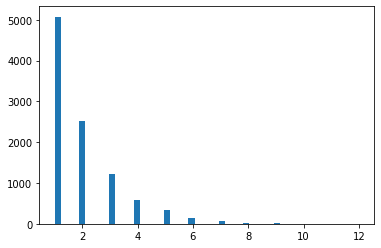

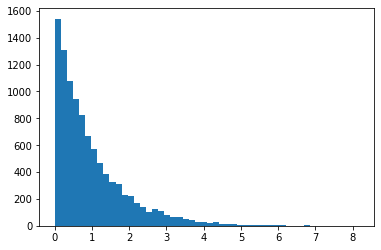

In [131]:
from scipy.stats import geom, expon
geom_distrib=geom(0.5).rvs(10000, random_state=42)
expon_distrib=expon(scale=1).rvs(10000, random_state=42)
plt.hist(geom_distrib, bins=50)
plt.show()
plt.hist(expon_distrib, bins=50)
plt.show()

In [142]:
testx = [(1 ,123 ,23 ,633) ,(35, 1312, 57, 8)]

In [143]:
type(testx)

list

In [196]:
np.array(testx)[0:]

array([[   1,  123,   23,  633],
       [  35, 1312,   57,    8]])

In [193]:
np.array(testx[:2][:3])

array([[   1,  123,   23,  633],
       [  35, 1312,   57,    8]])